<a href="https://colab.research.google.com/github/ThierrryScotto/Air-Passengers-Forecast/blob/main/air_passengers_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
dataset = pd.read_csv("/content/AirPassengers.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Parse strings to datetype

In [4]:
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexed_dataset = dataset.set_index(['Month'])

In [5]:
indexed_dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
from datetime import datetime
indexed_dataset.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### plot graph

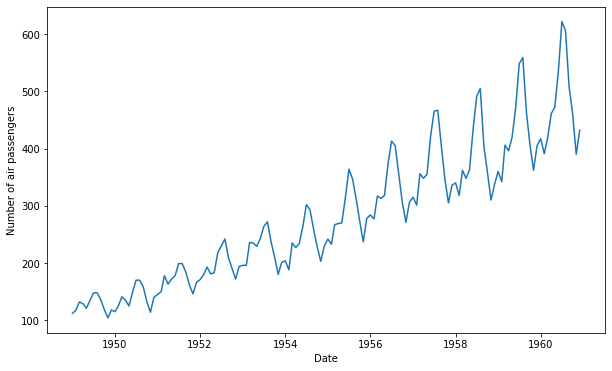

In [7]:
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexed_dataset)

## Determing rolling statistics

In [8]:
rolmean = indexed_dataset.rolling(window=12).mean()
rolstd = indexed_dataset.rolling(window=12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


### Plot rolling statistics

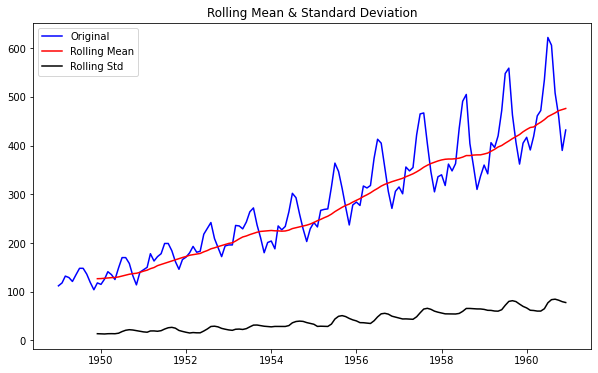

In [9]:
orig = plt.plot(indexed_dataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Perform Dickey-Fuller test

In [10]:
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test')
df_test = adfuller(indexed_dataset['Passengers'], autolag='AIC')

df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations used'])
for key, value in df_test[4].items():
  df_output['Critical Value (%s)'%key] = value

print(df_output)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Result of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### Estimating trend

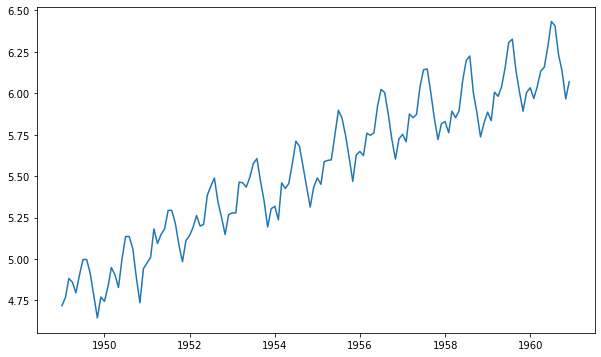

In [11]:
indexed_dataset_log_scale = np.log(indexed_dataset)
plt.plot(indexed_dataset_log_scale)

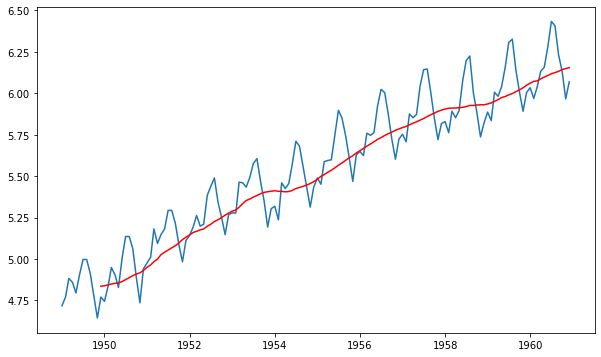

In [12]:
moving_average = indexed_dataset_log_scale.rolling(window=12).mean()
moving_std = indexed_dataset_log_scale.rolling(window=12).std()
plt.plot(indexed_dataset_log_scale)
plt.plot(moving_average, color='red')

## Turning into stationary

In [14]:
dataset_log_scaled_minus_moving_average = indexed_dataset_log_scale - moving_average
dataset_log_scaled_minus_moving_average.head(20)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


### Removing Nan value

In [15]:
dataset_log_scaled_minus_moving_average.dropna(inplace=True)
dataset_log_scaled_minus_moving_average.head(10)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [16]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(time_series):
  # Determining rolling statistics
  moving_average = time_series.rolling(window=12).mean()
  moving_std = time_series.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(time_series, color='blue', label='Original')
  med = plt.plot(moving_average, color='red', label='Rolling Mean')
  std = plt.plot(moving_std, color='black', label='Rolling STD')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  # perform Dickey-Fuller test
  print('Result of Dickey-Fuller test:')
  df_test = adfuller(time_series['Passengers'], autolag='AIC')
  df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations used'])
  for key, value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
  print(df_output)

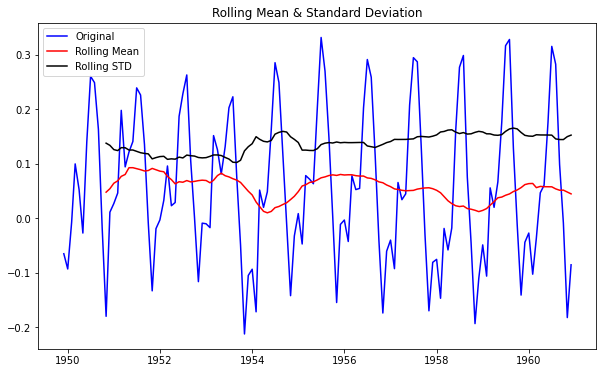

Result of Dickey-Fuller test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [17]:
test_stationarity(dataset_log_scaled_minus_moving_average)

## Weighted average to see the trend

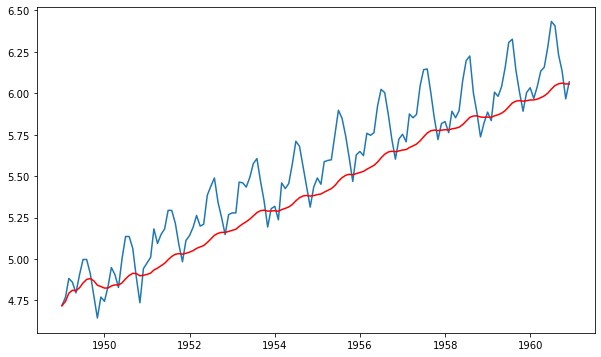

In [18]:
exponential_decay_weighted_average = indexed_dataset_log_scale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexed_dataset_log_scale)
plt.plot(exponential_decay_weighted_average, color='red')

### Subtracting the weighted average

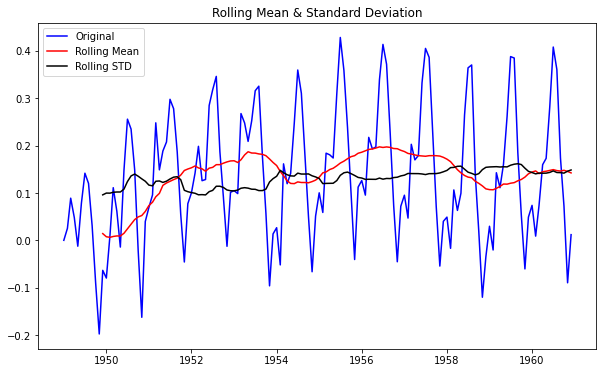

Result of Dickey-Fuller test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
dataset_log_scale_minus_moving_exponential_decay_average = indexed_dataset_log_scale - exponential_decay_weighted_average
test_stationarity(dataset_log_scale_minus_moving_exponential_decay_average)

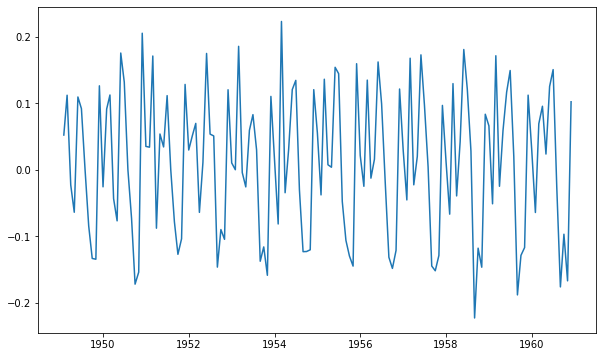

In [25]:
dataset_log_diff_shifting = indexed_dataset_log_scale - indexed_dataset_log_scale.shift()
plt.plot(dataset_log_diff_shifting)

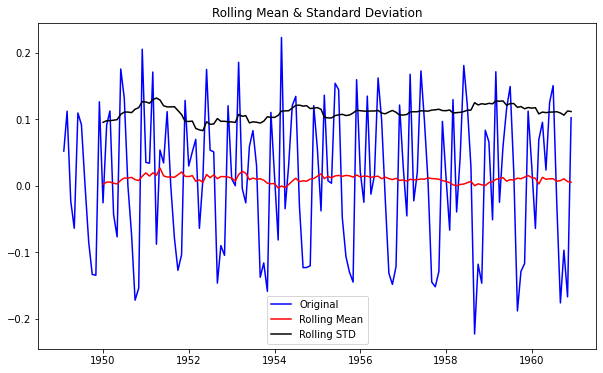

Result of Dickey-Fuller test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [26]:
dataset_log_diff_shifting.dropna(inplace=True)
test_stationarity(dataset_log_diff_shifting)

## Decompose

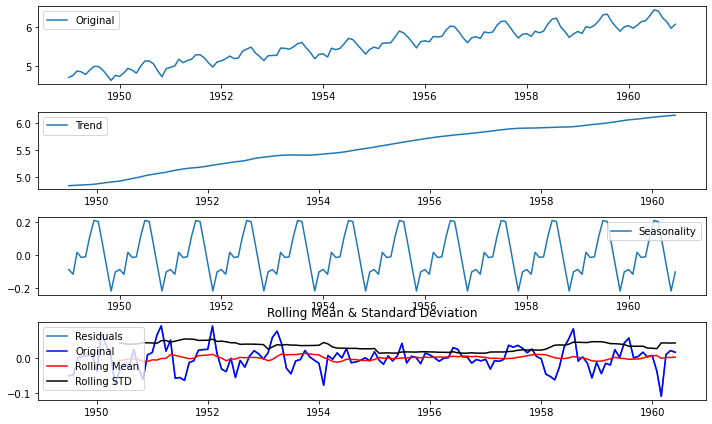

Result of Dickey-Fuller test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed_dataset_log_scale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexed_dataset_log_scale, label="Original")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc='best')
plt.tight_layout()

decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationarity(decomposed_log_data)